In [5]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, SimpleRNN, GRU, Bidirectional, LSTM, Dense, Dropout, LayerNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping

import bz2
import csv
import re

In [2]:
import bz2

# Load a subset of the training data
with bz2.BZ2File("C:/Users/PRAGYA/Desktop/index/train.ft.txt.bz2") as f:
    training_data = [f.readline().decode('utf-8').strip() for _ in range(3000)]

# Load a subset of the test data
with bz2.BZ2File("C:/Users/PRAGYA/Desktop/index/test.ft.txt.bz2") as f:
    test_data = [f.readline().decode('utf-8').strip() for _ in range(1000)]

# Print the subset sizes
print("Training data subset size:", len(training_data))
print("Test data subset size:", len(test_data))


Training data subset size: 3000
Test data subset size: 1000


In [3]:
training_data[0]


'__label__2 Stuning even for the non-gamer: This sound track was beautiful! It paints the senery in your mind so well I would recomend it even to people who hate vid. game music! I have played the game Chrono Cross but out of all of the games I have ever played it has the best music! It backs away from crude keyboarding and takes a fresher step with grate guitars and soulful orchestras. It would impress anyone who cares to listen! ^_^'

In [5]:
import re 
# Split the data into labels and texts
training_labels = [int(re.findall(r'__label__(\d)', line)[0]) for line in training_data]
training_texts = [re.sub(r'__label__\d ', '', line) for line in training_data]

test_labels = [int(re.findall(r'__label__(\d)', line)[0]) for line in test_data]
test_texts = [re.sub(r'__label__\d ', '', line) for line in test_data]

# Convert labels to binary (0 and 1)
training_labels = [0 if label == 1 else 1 for label in training_labels]
test_labels = [0 if label == 1 else 1 for label in test_labels]

In [7]:
import re
import nltk
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# Download stopwords if not already downloaded
nltk.download('stopwords')

def clean_text(text):
    """Cleans text by lowercasing, removing stopwords, and applying stemming."""
    ps = PorterStemmer()
    stop_words = set(stopwords.words('english'))
    
    # Convert to lowercase
    text = text.lower()
    
    # Remove non-alphabetic characters (keep spaces)
    text = re.sub(r'[^a-z\s]', '', text)
    
    # Tokenize and remove stopwords, apply stemming
    words = text.split()
    words = [ps.stem(word) for word in words if word not in stop_words]
    
    # Join words back into a string
    return " ".join(words)

# Apply function to training and test texts
training_texts = [clean_text(text) for text in training_texts]
test_texts = [clean_text(text) for text in test_texts]

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PRAGYA\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [8]:
training_texts[0]

'stune even nongam sound track beauti paint seneri mind well would recomend even peopl hate vid game music play game chrono cross game ever play best music back away crude keyboard take fresher step grate guitar soul orchestra would impress anyon care listen'

In [10]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Tokenization and padding
max_words = 1000
max_sequence_length = 100

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(training_texts)

X_train = tokenizer.texts_to_sequences(training_texts)
X_test = tokenizer.texts_to_sequences(test_texts)

X_train = pad_sequences(X_train, maxlen=max_sequence_length)
X_test = pad_sequences(X_test, maxlen=max_sequence_length)


In [12]:
import numpy as np

X_train = np.array(X_train)
print(X_train.shape)
X_test = np.array(X_test)
print(X_test.shape)
y_train = np.array(training_labels)
print(y_train.shape)
y_test = np.array(test_labels)
print(y_test.shape)


(3000, 100)
(1000, 100)
(3000,)
(1000,)


Epoch 1/50


c:\Users\PRAGYA\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 456ms/step - accuracy: 0.4833 - loss: 0.9424 - val_accuracy: 0.4990 - val_loss: 0.7607
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 491ms/step - accuracy: 0.5010 - loss: 0.8652 - val_accuracy: 0.4890 - val_loss: 0.7557
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 480ms/step - accuracy: 0.5260 - loss: 0.8300 - val_accuracy: 0.4980 - val_loss: 0.7647
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 420ms/step - accuracy: 0.5085 - loss: 0.8166 - val_accuracy: 0.4950 - val_loss: 0.7577
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 362ms/step - accuracy: 0.5013 - loss: 0.8140 - val_accuracy: 0.5010 - val_loss: 0.7278
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 365ms/step - accuracy: 0.5056 - loss: 0.8151 - val_accuracy: 0.4980 - val_loss: 0.7089
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 376ms/step - accuracy: 0.4990 - loss: 0.7918 - val_accuracy: 0.4970 - val_loss: 0.7032
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 363ms/step - accuracy: 0.5131 - loss: 0.7792 - val_accuracy: 0.5010 - val_loss: 0.7026
Epo

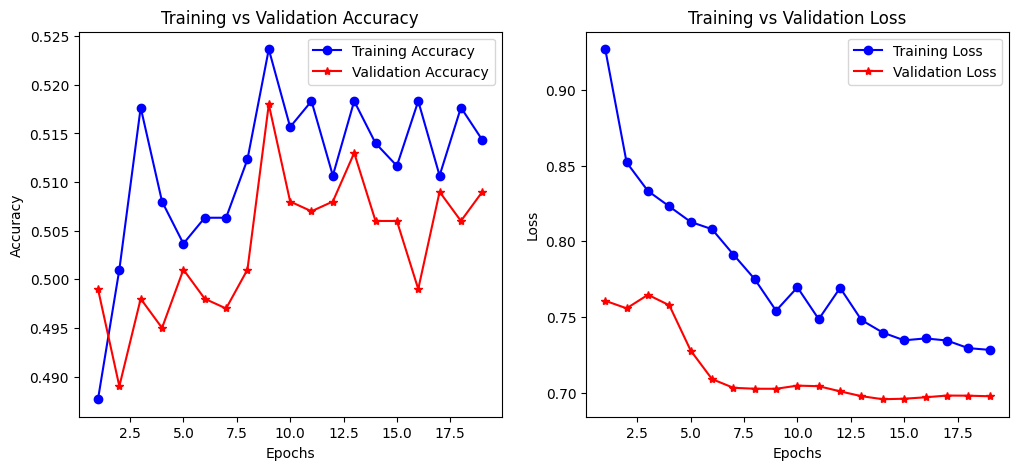

In [ ]:
# Define improved RNN model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, Dropout, LayerNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

model = Sequential([
    Embedding(input_dim=max_words, output_dim=300, input_length=max_sequence_length),  # Increased embedding size
    SimpleRNN(128, return_sequences=True, dropout=0.3),  # RNN layer with dropout
    LayerNormalization(),  # Added normalization for stability
    SimpleRNN(128, dropout=0.3),  # Second RNN layer
    LayerNormalization(),
    Dropout(0.3),
    Dense(64, activation="relu"),  # Extra dense layer
    Dropout(0.2),
    Dense(1, activation='sigmoid')  # Binary classification
])

# Compile with lower learning rate
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=5e-5), metrics=['accuracy'])

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train model
history = model.fit(X_train, y_train, epochs=50, batch_size=512, validation_data=(X_test, y_test), callbacks=[early_stopping], verbose=1)

# Extract values from history
epochs = range(1, len(history.history['accuracy']) + 1)
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot Accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, train_acc, 'bo-', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r*-', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss, 'bo-', label='Training Loss')
plt.plot(epochs, val_loss, 'r*-', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()

plt.show()

In [16]:
from sklearn.metrics import confusion_matrix, classification_report  # ✅ required imports

# Evaluate with a confusion matrix and classification report
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)



32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Confusion Matrix:
[[394 104]
 [390 112]]
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.79      0.61       498
           1       0.52      0.22      0.31       502

    accuracy                           0.51      1000
   macro avg       0.51      0.51      0.46      1000
weighted avg       0.51      0.51      0.46      1000



In [25]:
# Define improved model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Bidirectional, Dense, Dropout, LayerNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential([
    Embedding(input_dim=max_words, output_dim=300, input_length=max_sequence_length),  # Increased embedding size
    Bidirectional(LSTM(128, return_sequences=True, recurrent_dropout=0.2)),  # Added recurrent dropout
    LayerNormalization(),  # Added normalization for stability
    Dropout(0.3),
    Bidirectional(LSTM(128, recurrent_dropout=0.2)),  
    LayerNormalization(),
    Dropout(0.3),
    Dense(64, activation="relu"),  # Extra dense layer
    Dropout(0.2),
    Dense(1, activation='sigmoid')  # Binary classification
])

# Compile with lower learning rate
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=5e-5), metrics=['accuracy'])

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train model
history = model.fit(X_train, y_train, epochs=50, batch_size=512, validation_data=(X_test, y_test), callbacks=[early_stopping], verbose=1)

Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 48s 5s/step - accuracy: 0.4916 - loss: 0.9182 - val_accuracy: 0.5000 - val_loss: 0.7292
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 19s 3s/step - accuracy: 0.5184 - loss: 0.8304 - val_accuracy: 0.5140 - val_loss: 0.7098
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 40s 7s/step - accuracy: 0.5354 - loss: 0.7645 - val_accuracy: 0.5310 - val_loss: 0.6918
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 66s 11s/step - accuracy: 0.5411 - loss: 0.7575 - val_accuracy: 0.5540 - val_loss: 0.6806
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 85s 12s/step - accuracy: 0.5362 - loss: 0.7389 - val_accuracy: 0.5740 - val_loss: 0.6739
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 67s 12s/step - accuracy: 0.5635 - loss: 0.7094 - val_accuracy: 0.5820 - val_loss: 0.6687
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 57s 10s/step - accuracy: 0.5685 - loss: 0.7095 - val_accuracy: 0.5870 - val_loss: 0.6650
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 70s 12s/step - accuracy: 0.5868 - loss: 0.6862 - val_accuracy: 0.6310 - val_loss: 0.6519
Epo

In [26]:
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences

def predict_sentiment(text, model, tokenizer, max_sequence_length=100):
    # clean text
    text = clean_text(text)
    # Convert text to sequence
    sequence = tokenizer.texts_to_sequences([text])
    
    # Pad sequence
    padded_sequence = pad_sequences(sequence, maxlen=max_sequence_length)
    
    # Predict sentiment
    prediction = model.predict(padded_sequence)[0][0]  # Extract scalar value
    
    # Determine sentiment
    sentiment = "Positive 😊" if prediction > 0.5 else "Negative 😡"
    
    return sentiment, float(prediction)

# Example usage:
test_sentences = [
    "I love this product! It's amazing.",
    "This is the worst service I have ever experienced.",
    "The movie was okay, not great but not terrible either."
]

for sentence in test_sentences:
    sentiment, confidence = predict_sentiment(sentence, model, tokenizer)
    print(f"Text: {sentence}\nPredicted Sentiment: {sentiment} (Confidence: {confidence:.4f})\n")

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Text: I love this product! It's amazing.
Predicted Sentiment: Positive 😊 (Confidence: 0.7761)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 425ms/step
Text: This is the worst service I have ever experienced.
Predicted Sentiment: Negative 😡 (Confidence: 0.1764)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 468ms/step
Text: The movie was okay, not great but not terrible either.
Predicted Sentiment: Negative 😡 (Confidence: 0.4651)



In [27]:
model.save("lstm_model.h5")  # Saves architecture, weights & optimizer


import pickle

with open("tokenizer.pkl", "wb") as f:
    pickle.dump(tokenizer, f)

In [28]:
import tensorflow as tf
print(tf.__version__)

2.19.0
